<a href="https://colab.research.google.com/github/Ujjwalb2/investx/blob/main/InvestX-2_error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [199]:
pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [200]:
import numpy as np
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import ta
#from datetime import datetime

In [201]:
df = pd.read_csv('/content/HDFCBANK)(1.NS.csv')
print(df.head())
df=df.head(600)

         Date         Open         High          Low        Close   Volume
0  07-01-2020  1258.900024  1271.449951  1252.250000  1260.599976  7362247
1  08-01-2020  1246.949951  1262.150024  1240.050049  1257.300049  5666055
2  09-01-2020  1265.000000  1275.800049  1263.099976  1271.400024  4773158
3  10-01-2020  1284.099976  1286.900024  1275.099976  1282.699951  4607290
4  13-01-2020  1282.699951  1296.500000  1276.000000  1286.000000  3725784


In [202]:
#df['RSI'] = ta.momentum.rsi(df['Close'], window=14)

In [203]:
df['TP'] = (df['High'] + df['Low'] + df['Close']) / 3
df['VWAP'] = (df['TP'] * df['Volume']).cumsum() / df['Volume'].cumsum()


In [204]:
df

,Date,Open,High,Low,Close,Volume,TP,VWAP
0,07-01-2020,1258.900024,1271.449951,1252.250000,1260.599976,7362247,1261.433309,1261.433309
1,08-01-2020,1246.949951,1262.150024,1240.050049,1257.300049,5666055,1253.166707,1257.838134
2,09-01-2020,1265.000000,1275.800049,1263.099976,1271.400024,4773158,1270.100016,1261.125949
3,10-01-2020,1284.099976,1286.900024,1275.099976,1282.699951,4607290,1281.566650,1265.328604
4,13-01-2020,1282.699951,1296.500000,1276.000000,1286.000000,3725784,1286.166667,1268.299314
...,...,...,...,...,...,...,...,...
595,31-05-2022,1395.900024,1404.800049,1380.000000,1388.949951,6742694,1391.250000,1257.550453
596,01-06-2022,1380.000000,1400.449951,1379.150024,1394.849976,6045948,1391.483317,1257.675543
597,02-06-2022,1387.250000,1388.000000,1378.599976,1385.099976,5737510,1383.899984,1257.787319
598,03-06-2022,1398.300049,1400.750000,1376.300049,1380.300049,3478622,1385.783366,1257.856003


In [205]:
cols = list(df)[2:8]
print(cols)

['High', 'Low', 'Close', 'Volume', 'TP', 'VWAP']


In [206]:
df_for_training = df[cols].astype(float)

In [207]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [208]:
trainX = []
trainY = []

In [209]:
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14 # Number of past days we want to use to predict the future.

In [210]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 5])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (586, 14, 6).
trainY shape == (586, 1).


In [211]:
df_for_training_scaled

array([[-0.39286665, -0.32827755, -0.36657059, -0.5108541 , -0.36273519,
         1.31068033],
       [-0.43589735, -0.38402098, -0.38174072, -0.76221946, -0.4007733 ,
         1.27312173],
       [-0.37273877, -0.27870237, -0.31692158, -0.89454138, -0.32285603,
         1.30746935],
       ...,
       [ 0.14640964,  0.24903463,  0.20576959, -0.75163026,  0.20078545,
         1.27259087],
       [ 0.2054038 ,  0.23852591,  0.1837038 , -1.08638375,  0.20945169,
         1.27330841],
       [ 0.14178264,  0.16701858,  0.17519869, -1.14447414,  0.16152004,
         1.27389266]])

In [212]:
trainY

array([[ 1.29324399],
       [ 1.26731008],
       [ 1.25172046],
       [ 1.23630883],
       [ 1.22378413],
       [ 1.19000364],
       [ 1.16702785],
       [ 1.16213525],
       [ 1.16000388],
       [ 1.15847911],
       [ 1.15537934],
       [ 1.15465023],
       [ 1.15506423],
       [ 1.15463839],
       [ 1.14670495],
       [ 1.13987709],
       [ 1.13039078],
       [ 1.12498963],
       [ 1.11835948],
       [ 1.10416453],
       [ 1.09117338],
       [ 1.0771575 ],
       [ 1.05671811],
       [ 1.02628265],
       [ 1.01073625],
       [ 0.98695267],
       [ 0.93874919],
       [ 0.91345344],
       [ 0.87488781],
       [ 0.80644114],
       [ 0.74941489],
       [ 0.60544591],
       [ 0.45890375],
       [ 0.39136262],
       [ 0.29341421],
       [ 0.12213356],
       [-0.07096385],
       [-0.28620335],
       [-0.43114018],
       [-0.60129581],
       [-0.7002311 ],
       [-0.77993994],
       [-0.83878971],
       [-0.8990457 ],
       [-0.94800608],
       [-0

In [213]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True)) 
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 14, 64)            18176     
                                                                 
 lstm_13 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30,625
Trainable params: 30,625
Non-trainable params: 0
_________________________________________________________________


In [214]:
history = model.fit(trainX, trainY, epochs=5, batch_size=3, validation_split=0.1, verbose=1)

Epoch 1/5
176/176 [==============================] - 8s 19ms/step - loss: 0.1953 - val_loss: 0.1223
Epoch 2/5
176/176 [==============================] - 5s 31ms/step - loss: 0.0371 - val_loss: 0.0138
Epoch 3/5
176/176 [==============================] - 7s 42ms/step - loss: 0.0330 - val_loss: 0.0780
Epoch 4/5
176/176 [==============================] - 6s 34ms/step - loss: 0.0290 - val_loss: 0.0035
Epoch 5/5
176/176 [==============================] - 8s 47ms/step - loss: 0.0309 - val_loss: 0.0261


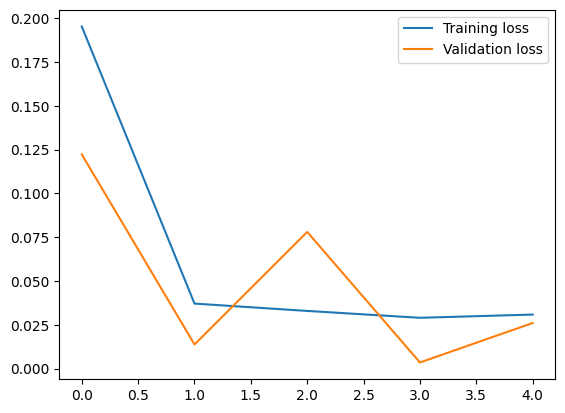

In [215]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [216]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [217]:
df2= df.head(600)
train_dates = pd.to_datetime(df2['Date'])
print(train_dates.tail(15)) 

585   2022-05-17
586   2022-05-18
587   2022-05-19
588   2022-05-20
589   2022-05-23
590   2022-05-24
591   2022-05-25
592   2022-05-26
593   2022-05-27
594   2022-05-30
595   2022-05-31
596   2022-01-06
597   2022-02-06
598   2022-03-06
599   2022-06-06
Name: Date, dtype: datetime64[ns]


<ipython-input-217-5f8b49ea0d07>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  train_dates = pd.to_datetime(df2['Date'])


In [218]:
n_past = 600
n_days_for_prediction=586  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq='M').tolist()
print(predict_period_dates)

[Timestamp('2020-07-31 00:00:00', freq='M'), Timestamp('2020-08-31 00:00:00', freq='M'), Timestamp('2020-09-30 00:00:00', freq='M'), Timestamp('2020-10-31 00:00:00', freq='M'), Timestamp('2020-11-30 00:00:00', freq='M'), Timestamp('2020-12-31 00:00:00', freq='M'), Timestamp('2021-01-31 00:00:00', freq='M'), Timestamp('2021-02-28 00:00:00', freq='M'), Timestamp('2021-03-31 00:00:00', freq='M'), Timestamp('2021-04-30 00:00:00', freq='M'), Timestamp('2021-05-31 00:00:00', freq='M'), Timestamp('2021-06-30 00:00:00', freq='M'), Timestamp('2021-07-31 00:00:00', freq='M'), Timestamp('2021-08-31 00:00:00', freq='M'), Timestamp('2021-09-30 00:00:00', freq='M'), Timestamp('2021-10-31 00:00:00', freq='M'), Timestamp('2021-11-30 00:00:00', freq='M'), Timestamp('2021-12-31 00:00:00', freq='M'), Timestamp('2022-01-31 00:00:00', freq='M'), Timestamp('2022-02-28 00:00:00', freq='M'), Timestamp('2022-03-31 00:00:00', freq='M'), Timestamp('2022-04-30 00:00:00', freq='M'), Timestamp('2022-05-31 00:00:00'

In [219]:
prediction = model.predict(trainX[-n_days_for_prediction:])

19/19 [==============================] - 2s 14ms/step


In [220]:
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,5]

In [221]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'price':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [222]:
original = df[['Date', 'Close']]
original['Date']=pd.to_datetime(original['Date'])
original


<ipython-input-222-4a6fe6619364>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  original['Date']=pd.to_datetime(original['Date'])
<ipython-input-222-4a6fe6619364>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


,Date,Close
0,2020-07-01,1260.599976
1,2020-08-01,1257.300049
2,2020-09-01,1271.400024
3,2020-10-01,1282.699951
4,2020-01-13,1286.000000
...,...,...
595,2022-05-31,1388.949951
596,2022-01-06,1394.849976
597,2022-02-06,1385.099976
598,2022-03-06,1380.300049


In [223]:
df_forecast

,Date,price
0,2020-07-31,1273.316895
1,2020-08-31,1272.791626
2,2020-09-30,1271.982056
3,2020-10-31,1270.671143
4,2020-11-30,1269.148315
...,...,...
581,2068-12-31,1250.803345
582,2069-01-31,1251.012939
583,2069-02-28,1251.685547
584,2069-03-31,1252.076294


<Axes: xlabel='Date'>

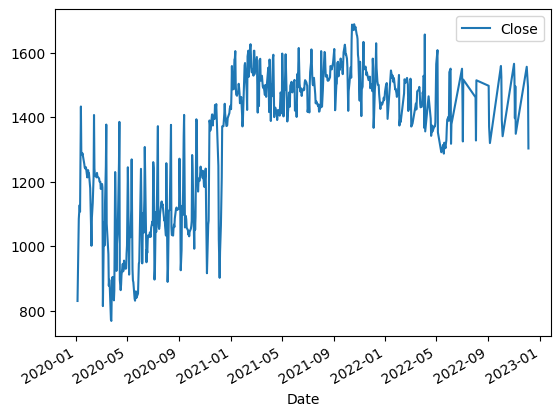

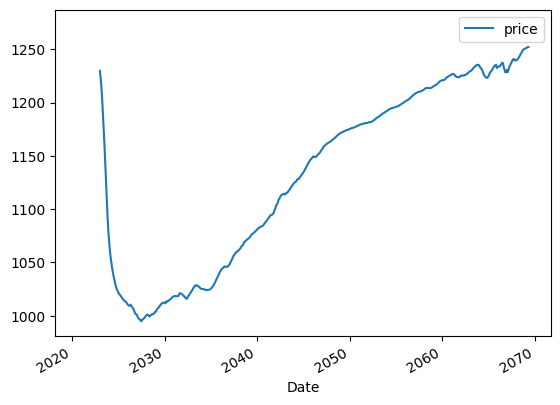

In [224]:
original.plot(x='Date',y='Close')
original= pd.concat([original,df_forecast],axis=0)
original.plot(x='Date',y='price')
#f_forecast.plot(x='Date',y='price')


In [225]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [226]:
def RMS(actual,predicted):
    rms = math.sqrt((((actual-predicted)/actual)**2).mean())
    return rms

In [227]:
rmse = sqrt(mean_squared_error(original.iloc[:len(df_forecast), 1], df_forecast.iloc[:, 1]))  #calculating rsme(root mean square error)

In [228]:
rmse


261.67901232166173

In [233]:

error = (RMS(original['Close'],df_forecast['price']))*100


In [234]:
error


17.794872311219553

In [235]:
Efficiency = 100 - error
print("Efficiency = ",Efficiency,"%")

Efficiency =  82.20512768878045 %
